Final Loss_model0 : 0.05004952605694596
Final Accuracy_model0: 0.9844333333333334%
Final Loss_model1 : 0.0432606398557146
Final Accuracy_model1 : 0.98655%
Final Loss_model2 : 0.03028062164716086
Final Accuracy_model2 : 0.9899%


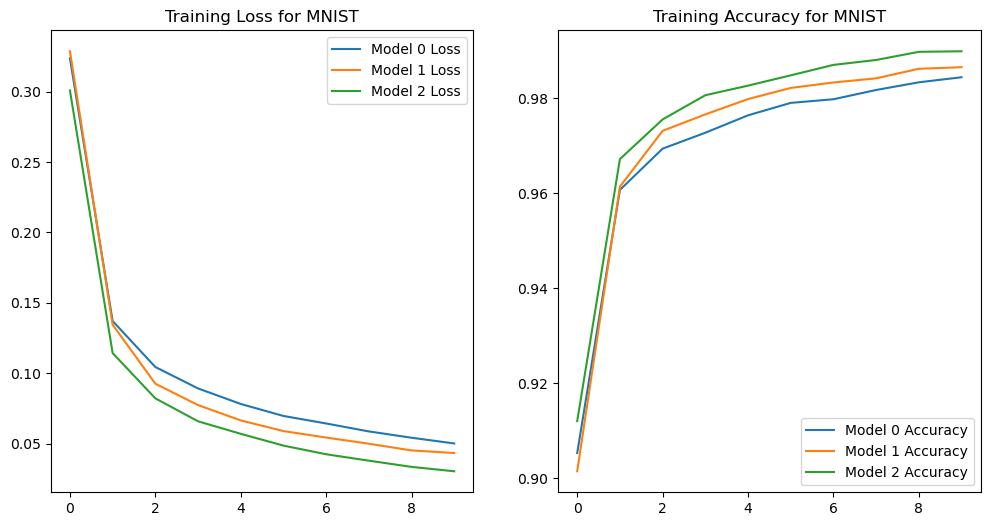

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt

# Download dataset of MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

#train and test the datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

class CNN_Model_MNIST(nn.Module):
    def __init__(self, channels):
        super(CNN_Model_MNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, channels, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(28*28*channels, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

# These are Instantiate models with different channel sizes to maintain parameter constraints
model0_mnist = CNN_Model_MNIST(4)
model1_mnist = CNN_Model_MNIST(5)
model2_mnist = CNN_Model_MNIST(6)

optimizer0_mnist = optim.Adam(model0_mnist.parameters(), lr=0.001)
optimizer1_mnist = optim.Adam(model1_mnist.parameters(), lr=0.001)
optimizer2_mnist = optim.Adam(model2_mnist.parameters(), lr=0.001)

criterion_mnist = nn.CrossEntropyLoss()

# Here we are training the function for MNIST
def train_mnist_model(model, optimizer, criterion, epochs=10):
    loss_history, acc_history = [], []
    for epoch in range(epochs):
        epoch_loss, correct = 0, 0
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

        acc = correct / len(train_loader.dataset)
        loss_history.append(epoch_loss / len(train_loader))
        acc_history.append(acc)
    return loss_history, acc_history

# Training all models
loss_model0_mnist, acc_model0_mnist = train_mnist_model(model0_mnist, optimizer0_mnist, criterion_mnist)
print(f"Final Loss_model0 : {loss_model0_mnist[-1]}")
print(f"Final Accuracy_model0: {acc_model0_mnist[-1]}%")

loss_model1_mnist, acc_model1_mnist = train_mnist_model(model1_mnist, optimizer1_mnist, criterion_mnist)
print(f"Final Loss_model1 : {loss_model1_mnist[-1]}")
print(f"Final Accuracy_model1 : {acc_model1_mnist[-1]}%")

loss_model2_mnist, acc_model2_mnist = train_mnist_model(model2_mnist, optimizer2_mnist, criterion_mnist)
print(f"Final Loss_model2 : {loss_model2_mnist[-1]}")
print(f"Final Accuracy_model2 : {acc_model2_mnist[-1]}%")

# Plotting training loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss_model0_mnist, label='Model 0 Loss')
plt.plot(loss_model1_mnist, label='Model 1 Loss')
plt.plot(loss_model2_mnist, label='Model 2 Loss')
plt.legend()
plt.title('Training Loss for MNIST')

# Plotting training accuracy
plt.subplot(1, 2, 2)
plt.plot(acc_model0_mnist, label='Model 0 Accuracy')
plt.plot(acc_model1_mnist, label='Model 1 Accuracy')
plt.plot(acc_model2_mnist, label='Model 2 Accuracy')
plt.legend()
plt.title('Training Accuracy for MNIST')

plt.show()